## Import Libraries

In [16]:
#!pip install nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.datasets import imdb
from nltk.corpus import brown
from nltk.corpus import treebank
from nltk.corpus import conll2000
from tensorflow.keras.preprocessing.sequence import pad_sequences
#from tensorflow.keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [14]:
from nltk.corpus import brown 

In [13]:
##A new window should open, showing the NLTK Downloader.
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [17]:
treebank_corpus = treebank.tagged_sents(tagset='universal') 
brown_corpus = brown.tagged_sents(tagset='universal')
conll_corpus = conll2000.tagged_sents(tagset='universal')
tagged_sentences = treebank_corpus + conll_corpus

In [20]:
len(tagged_sentences) #no of sentances

14862

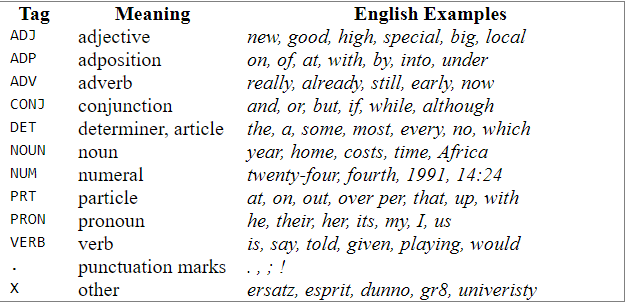

In [23]:
tagged_sentences[1] # a look into what the sentaces look like

[('Mr.', 'NOUN'),
 ('Vinken', 'NOUN'),
 ('is', 'VERB'),
 ('chairman', 'NOUN'),
 ('of', 'ADP'),
 ('Elsevier', 'NOUN'),
 ('N.V.', 'NOUN'),
 (',', '.'),
 ('the', 'DET'),
 ('Dutch', 'NOUN'),
 ('publishing', 'VERB'),
 ('group', 'NOUN'),
 ('.', '.')]

### Divide into words and Tags

In [25]:
X=[] # for appending sentances 
Y=[]
for sent in tagged_sentences:
    X_sent=[] # for appending words
    Y_sent=[]
    for word in sent:
        X_sent.append(word[0])
        Y_sent.append(word[1])
    X.append(X_sent)
    Y.append(Y_sent)

In [29]:
for i in range(4):
    print(X[i])
    print(Y[i])

['Pierre', 'Vinken', ',', '61', 'years', 'old', ',', 'will', 'join', 'the', 'board', 'as', 'a', 'nonexecutive', 'director', 'Nov.', '29', '.']
['NOUN', 'NOUN', '.', 'NUM', 'NOUN', 'ADJ', '.', 'VERB', 'VERB', 'DET', 'NOUN', 'ADP', 'DET', 'ADJ', 'NOUN', 'NOUN', 'NUM', '.']
['Mr.', 'Vinken', 'is', 'chairman', 'of', 'Elsevier', 'N.V.', ',', 'the', 'Dutch', 'publishing', 'group', '.']
['NOUN', 'NOUN', 'VERB', 'NOUN', 'ADP', 'NOUN', 'NOUN', '.', 'DET', 'NOUN', 'VERB', 'NOUN', '.']
['Rudolph', 'Agnew', ',', '55', 'years', 'old', 'and', 'former', 'chairman', 'of', 'Consolidated', 'Gold', 'Fields', 'PLC', ',', 'was', 'named', '*-1', 'a', 'nonexecutive', 'director', 'of', 'this', 'British', 'industrial', 'conglomerate', '.']
['NOUN', 'NOUN', '.', 'NUM', 'NOUN', 'ADJ', 'CONJ', 'ADJ', 'NOUN', 'ADP', 'NOUN', 'NOUN', 'NOUN', 'NOUN', '.', 'VERB', 'VERB', 'X', 'DET', 'ADJ', 'NOUN', 'ADP', 'DET', 'ADJ', 'ADJ', 'NOUN', '.']
['A', 'form', 'of', 'asbestos', 'once', 'used', '*', '*', 'to', 'make', 'Kent', 

In [31]:
len(X) ## no of sentances

14862

In [36]:
num_words=len(set([word.lower() for sent in X for word in sent]))
num_tags=len(set([tag.lower() for sent in Y for tag in sent]))

In [37]:
print(num_words)#unique no of words
print(num_tags)#unique no of tags

23562
12


### Vectorize the Data

In [40]:
#encode X
word_tokenizer=Tokenizer()
word_tokenizer.fit_on_texts(X)
X_encoded=word_tokenizer.texts_to_sequences(X) #value of array is index of word in dictionary 
X_encoded_one=word_tokenizer.texts_to_matrix(X,mode='binary')

In [45]:
print(X_encoded[1])
print(len(X[1]))
print(len(X_encoded[1]))

[27, 8865, 15, 149, 4, 12449, 7065, 1, 2, 2828, 1259, 116, 3]
13
13


In [46]:
print(X_encoded_one[1])
print(len(X[1]))
print(len(X_encoded_one[1])) # len of single sentance is padded in whole dictionary words (num of words)

[0. 1. 1. ... 0. 0. 0.]
13
23563


In [48]:
#encode Y
tag_tokenizer=Tokenizer()
tag_tokenizer.fit_on_texts(Y)
Y_encoded=tag_tokenizer.texts_to_sequences(Y)

In [52]:
len(Y_encoded[1])

13

### Pad Sequences

Since the input to our feed forward network can't be variable we will pad them to be same.\
The longest sentance would be chosen and according to it's length other sentances would be padded.

In [59]:
## Find out the maximum Length
maxi=0
for i in range(len(X)):
    maxi=max(len(X[i]),maxi)

In [60]:
maxi

271

In [62]:
X_padded=pad_sequences(X_encoded,maxlen=maxi,padding='pre',truncating='post') # adding zeros before
Y_padded=pad_sequences(Y_encoded,maxlen=maxi,padding='pre',truncating='post') #adding zeros before

In [67]:
X_padded[1] #[27, 8865, 15, 149, 4, 12449, 7065, 1, 2, 2828, 1259, 116, 3]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [65]:
## Proof of padding
for i in range(5):
    print(len(X_padded[i]))

271
271
271
271
271


In [66]:
len(word_tokenizer.word_index) # total no of words

23562

In [68]:
word2id=word_tokenizer.word_index  # mapping of index to words

In [69]:
word2id

{',': 1,
 'the': 2,
 '.': 3,
 'of': 4,
 'to': 5,
 'a': 6,
 'in': 7,
 'and': 8,
 'for': 9,
 "'s": 10,
 'that': 11,
 '$': 12,
 '``': 13,
 "''": 14,
 'is': 15,
 'said': 16,
 'it': 17,
 'on': 18,
 '%': 19,
 'at': 20,
 'by': 21,
 'from': 22,
 'million': 23,
 'as': 24,
 'was': 25,
 'with': 26,
 'mr.': 27,
 'be': 28,
 'are': 29,
 'its': 30,
 'an': 31,
 "n't": 32,
 'but': 33,
 'he': 34,
 'has': 35,
 'have': 36,
 '*-1': 37,
 'or': 38,
 '0': 39,
 'will': 40,
 'new': 41,
 '*': 42,
 'they': 43,
 'company': 44,
 'this': 45,
 '*t*-1': 46,
 'which': 47,
 'year': 48,
 'were': 49,
 'would': 50,
 'says': 51,
 'about': 52,
 '--': 53,
 '*u*': 54,
 'more': 55,
 'their': 56,
 'market': 57,
 'u.s.': 58,
 'up': 59,
 'than': 60,
 'billion': 61,
 'had': 62,
 'also': 63,
 'his': 64,
 'who': 65,
 'one': 66,
 'share': 67,
 'some': 68,
 'been': 69,
 'stock': 70,
 'other': 71,
 ':': 72,
 'i': 73,
 'not': 74,
 ';': 75,
 'we': 76,
 'if': 77,
 'president': 78,
 'trading': 79,
 'when': 80,
 'corp.': 81,
 'all': 82,
 'be

### Word Embeddings

Dimensions of a word embedding is: (VOCABULARY_SIZE, EMBEDDING_DIMENSION) 
Example of Word Embeddings


| features | King | Queen |
|----------|------|-------|
| Gender   | 1    |  -1   |
| Hieght   | 1    |  0.75 | 

In [71]:
#!pip install gensim
from gensim.models import KeyedVectors

  Created wheel for smart-open: filename=smart_open-4.2.0-py3-none-any.whl size=109637 sha256=1e1a5a36b1441acdc506dc976817949f46cbbdeace53d6842f2867a0d611717d
  Stored in directory: c:\users\arish\appdata\local\pip\cache\wheels\24\f6\ea\70a0761bdfaeacff66662751fe71920e25c4c43d97098a3886
Successfully built smart-open


In [72]:
# Download From https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit
path = 'GoogleNews-vectors-negative300.bin'
# load word2vec using the following function present in the gensim library
word2vec = KeyedVectors.load_word2vec_format(path, binary=True)

In [78]:
#demonstration of  what word2vec can do
word2vec.most_similar('Toothpaste')

[('toothpaste', 0.6932885646820068),
 ('toothpastes', 0.6271893382072449),
 ('tooth_paste', 0.6087831258773804),
 ('Toothpastes', 0.6005285382270813),
 ('Sensodyne', 0.5976223349571228),
 ('Whitening', 0.587727963924408),
 ('Aquafresh_Extreme_Clean', 0.5863484740257263),
 ('Tartar_Control', 0.5816381573677063),
 ('Deodorant', 0.5793443322181702),
 ('whitening_toothpaste', 0.5768619775772095)]

In [120]:
len(word_tokenizer.word_index)+1

23563

In [94]:
import numpy as np
Embedding_size= 300 # 300 dimensions 
Vocab_size=len(word_tokenizer.word_index)+1
#create an empty array of fit dimension
embedding_weights=np.zeros((Vocab_size,Embedding_size))

word2id=word_tokenizer.word_index
count=0
for word,index in word2id.items():
    try:
        embedding_weights[index,:]=word2vec[word]
    except KeyError:
        print('The Key {0} is not present in word2vec'.format(word))
        count+=1
        pass

The Key , is not present in word2vec
The Key . is not present in word2vec
The Key of is not present in word2vec
The Key to is not present in word2vec
The Key a is not present in word2vec
The Key and is not present in word2vec
The Key 's is not present in word2vec
The Key `` is not present in word2vec
The Key '' is not present in word2vec
The Key mr. is not present in word2vec
The Key *-1 is not present in word2vec
The Key *t*-1 is not present in word2vec
The Key -- is not present in word2vec
The Key *u* is not present in word2vec
The Key u.s. is not present in word2vec
The Key : is not present in word2vec
The Key ; is not present in word2vec
The Key corp. is not present in word2vec
The Key -rrb- is not present in word2vec
The Key -lrb- is not present in word2vec
The Key *-2 is not present in word2vec
The Key *t*-2 is not present in word2vec
The Key co. is not present in word2vec
The Key ' is not present in word2vec
The Key 10 is not present in word2vec
The Key 30 is not present in word

The Key remics is not present in word2vec
The Key 1.22 is not present in word2vec
The Key fund-raising is not present in word2vec
The Key houston-based is not present in word2vec
The Key biehl is not present in word2vec
The Key mateo is not present in word2vec
The Key 10.4 is not present in word2vec
The Key birnbaum is not present in word2vec
The Key chiron is not present in word2vec
The Key pryor is not present in word2vec
The Key special-interest is not present in word2vec
The Key veronis is not present in word2vec
The Key 1.44 is not present in word2vec
The Key double-decker is not present in word2vec
The Key 1.11 is not present in word2vec
The Key rtc is not present in word2vec
The Key 2010 is not present in word2vec
The Key newsedge is not present in word2vec
The Key darman is not present in word2vec
The Key lybrand is not present in word2vec
The Key mcnally is not present in word2vec
The Key 1.32 is not present in word2vec
The Key foreign-exchange is not present in word2vec
The K

The Key transamerica is not present in word2vec
The Key 1.35 is not present in word2vec
The Key seattle-based is not present in word2vec
The Key 62.1 is not present in word2vec
The Key 1.26 is not present in word2vec
The Key 260 is not present in word2vec
The Key cross-border is not present in word2vec
The Key pretoria is not present in word2vec
The Key 3.55 is not present in word2vec
The Key guber\/peters is not present in word2vec
The Key komatsu is not present in word2vec
The Key 1.17 is not present in word2vec
The Key 43-year-old is not present in word2vec
The Key 1.49 is not present in word2vec
The Key bmp-1 is not present in word2vec
The Key clarence is not present in word2vec
The Key eeoc is not present in word2vec
The Key metallgesellschaft is not present in word2vec
The Key g.m.b is not present in word2vec
The Key 1,100 is not present in word2vec
The Key theodore is not present in word2vec
The Key staff-reduction is not present in word2vec
The Key sternberg is not present in w

The Key three-lawyer is not present in word2vec
The Key 520-lawyer is not present in word2vec
The Key 353 is not present in word2vec
The Key *t*-139 is not present in word2vec
The Key tie-breaking is not present in word2vec
The Key computer-system-design is not present in word2vec
The Key antitrust-law is not present in word2vec
The Key *t*-140 is not present in word2vec
The Key low-ball is not present in word2vec
The Key u.s.-japan is not present in word2vec
The Key one-yen is not present in word2vec
The Key 77,000 is not present in word2vec
The Key saitama is not present in word2vec
The Key wakayama is not present in word2vec
The Key michio is not present in word2vec
The Key sasaki is not present in word2vec
The Key keidanren is not present in word2vec
The Key *t*-141 is not present in word2vec
The Key *t*-142 is not present in word2vec
The Key 29.3 is not present in word2vec
The Key 28.4 is not present in word2vec
The Key wheel-loader is not present in word2vec
The Key *t*-143 is no

The Key lorain is not present in word2vec
The Key 34.625 is not present in word2vec
The Key txo is not present in word2vec
The Key 15.5 is not present in word2vec
The Key 721 is not present in word2vec
The Key 2.62 is not present in word2vec
The Key 598 is not present in word2vec
The Key 2.07 is not present in word2vec
The Key mcfarlan is not present in word2vec
The Key diloreto is not present in word2vec
The Key delmont is not present in word2vec
The Key constitutional-law is not present in word2vec
The Key 1.5890 is not present in word2vec
The Key 2.9495 is not present in word2vec
The Key 1.5940 is not present in word2vec
The Key 2.9429 is not present in word2vec
The Key 2.90 is not present in word2vec
The Key 141.95 is not present in word2vec
The Key 141.35 is not present in word2vec
The Key 367.30 is not present in word2vec
The Key 366.50 is not present in word2vec
The Key 40-a-share is not present in word2vec
The Key 106.6 is not present in word2vec
The Key 2,664,098 is not presen

The Key private-line is not present in word2vec
The Key three-month-old is not present in word2vec
The Key 160,000 is not present in word2vec
The Key non-regulated is not present in word2vec
The Key 81.125 is not present in word2vec
The Key non-telephone is not present in word2vec
The Key monteith is not present in word2vec
The Key 423.9 is not present in word2vec
The Key 394.4 is not present in word2vec
The Key 41.2 is not present in word2vec
The Key 333.3 is not present in word2vec
The Key 314 is not present in word2vec
The Key 85.50 is not present in word2vec
The Key 12.6 is not present in word2vec
The Key 298 is not present in word2vec
The Key ginn is not present in word2vec
The Key 807 is not present in word2vec
The Key 88.7 is not present in word2vec
The Key fibercom is not present in word2vec
The Key 552 is not present in word2vec
The Key 5.91 is not present in word2vec
The Key 48.375 is not present in word2vec
The Key petrofina is not present in word2vec
The Key 2.66 is not pre

The Key foote is not present in word2vec
The Key belding is not present in word2vec
The Key chesebrough-pond is not present in word2vec
The Key mccann is not present in word2vec
The Key mccann-erickson is not present in word2vec
The Key ac&r\/ccl is not present in word2vec
The Key amstel is not present in word2vec
The Key marysville is not present in word2vec
The Key 75th is not present in word2vec
The Key 1915-1923 is not present in word2vec
The Key armenians is not present in word2vec
The Key anti-turkish is not present in word2vec
The Key judeo-christian is not present in word2vec
The Key 18-story is not present in word2vec
The Key 'n' is not present in word2vec
The Key chalmers is not present in word2vec
The Key wylie is not present in word2vec
The Key gentleladies is not present in word2vec
The Key neighbhorhoods is not present in word2vec
The Key three-year-old is not present in word2vec
The Key panglossian is not present in word2vec
The Key non-financial is not present in word2v

In [96]:
print(len(word_tokenizer.word_index)-count,"These many words were present in word2vec")

15782 These many words were present in word2vec


In [106]:
## Change Y_padded to one_hot_encoding
import tensorflow as tf
Y_one=tf.keras.utils.to_categorical(
    Y_padded)

In [113]:
# for each sentance there are 271 shaped array denoting word index which inturn for each word there is 13 shaped
# array denoting possible 13 tags for a single word
Y_one.shape 

(14862, 271, 13)

In [114]:
# 14862 sentances , each sentance is a vector of size 271
X_padded.shape

(14862, 271)

### LSTM Model

In [117]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import LSTM, GRU, Bidirectional, SimpleRNN, RNN
from tensorflow.keras.models import Model

In [122]:
lstm_model=Sequential()
lstm_model.add(Embedding(input_dim=num_words+1,output_dim=300,input_length=271,weights=[embedding_weights],trainable=True))
lstm_model.add(LSTM(64,return_sequences=True))
lstm_model.add(TimeDistributed(Dense(13,activation='softmax')))

In [123]:
lstm_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [124]:
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 271, 300)          7068900   
_________________________________________________________________
lstm (LSTM)                  (None, 271, 64)           93440     
_________________________________________________________________
time_distributed (TimeDistri (None, 271, 13)           845       
Total params: 7,163,185
Trainable params: 7,163,185
Non-trainable params: 0
_________________________________________________________________


In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_padded, Y_one, test_size=0.2, random_state=4)

In [127]:
history=lstm_model.fit(X_train,Y_train,batch_size=64,validation_data=(X_test,Y_test),epochs=10)

Epoch 1/10
186/186 [==============================] - 14s 76ms/step - loss: 0.3597 - acc: 0.9339 - val_loss: 0.1469 - val_acc: 0.9651
Epoch 2/10
186/186 [==============================] - 14s 74ms/step - loss: 0.0873 - acc: 0.9792 - val_loss: 0.0471 - val_acc: 0.9910
Epoch 3/10
186/186 [==============================] - 14s 75ms/step - loss: 0.0286 - acc: 0.9954 - val_loss: 0.0205 - val_acc: 0.9959
Epoch 4/10
186/186 [==============================] - 14s 74ms/step - loss: 0.0138 - acc: 0.9972 - val_loss: 0.0144 - val_acc: 0.9963
Epoch 5/10
186/186 [==============================] - 13s 72ms/step - loss: 0.0097 - acc: 0.9976 - val_loss: 0.0123 - val_acc: 0.9964
Epoch 6/10
186/186 [==============================] - 13s 72ms/step - loss: 0.0079 - acc: 0.9978 - val_loss: 0.0113 - val_acc: 0.9966
Epoch 7/10
186/186 [==============================] - 14s 75ms/step - loss: 0.0069 - acc: 0.9980 - val_loss: 0.0107 - val_acc: 0.9967
Epoch 8/10
186/186 [==============================] - 14s 74ms

In [142]:
len(X_train[0])

271

In [148]:
m=lstm_model.predict(X_train[0])

In [149]:
m.shape

(271, 1, 13)

### Plot Accuracy Graph

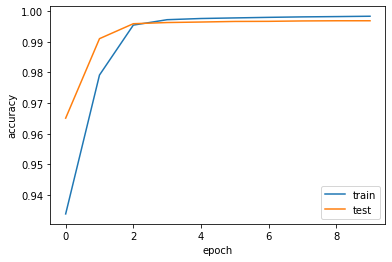

In [131]:
import matplotlib.pyplot as plt
train_acc=history.history['acc']
test_acc=history.history['val_acc']
epochs=range(10)
plt.plot(epochs,train_acc)
plt.plot(epochs,test_acc)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="lower right")

### Predictions

In [287]:
def get_label(text):
    text=[text]
    word_tokenizer=Tokenizer()
    word_tokenizer.fit_on_texts(X)
    text_encoded=word_tokenizer.texts_to_sequences(text) 
    text_padded=pad_sequences(text_encoded,maxlen=maxi,padding='pre',truncating='post')
    print(text_padded)
    return lstm_model.predict(text_padded),text_padded,tag_tokenizer.word_index

In [288]:
k,text_padded,tag_index=get_label('Mr.Vinken is the chairman of a large company')

[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0 

In [306]:
text_padded=text_padded.reshape(-1)

In [289]:
k=k.reshape(271,13)

In [319]:
word_index=word_tokenizer.word_index

In [320]:
word_index

{',': 1,
 'the': 2,
 '.': 3,
 'of': 4,
 'to': 5,
 'a': 6,
 'in': 7,
 'and': 8,
 'for': 9,
 "'s": 10,
 'that': 11,
 '$': 12,
 '``': 13,
 "''": 14,
 'is': 15,
 'said': 16,
 'it': 17,
 'on': 18,
 '%': 19,
 'at': 20,
 'by': 21,
 'from': 22,
 'million': 23,
 'as': 24,
 'was': 25,
 'with': 26,
 'mr.': 27,
 'be': 28,
 'are': 29,
 'its': 30,
 'an': 31,
 "n't": 32,
 'but': 33,
 'he': 34,
 'has': 35,
 'have': 36,
 '*-1': 37,
 'or': 38,
 '0': 39,
 'will': 40,
 'new': 41,
 '*': 42,
 'they': 43,
 'company': 44,
 'this': 45,
 '*t*-1': 46,
 'which': 47,
 'year': 48,
 'were': 49,
 'would': 50,
 'says': 51,
 'about': 52,
 '--': 53,
 '*u*': 54,
 'more': 55,
 'their': 56,
 'market': 57,
 'u.s.': 58,
 'up': 59,
 'than': 60,
 'billion': 61,
 'had': 62,
 'also': 63,
 'his': 64,
 'who': 65,
 'one': 66,
 'share': 67,
 'some': 68,
 'been': 69,
 'stock': 70,
 'other': 71,
 ':': 72,
 'i': 73,
 'not': 74,
 ';': 75,
 'we': 76,
 'if': 77,
 'president': 78,
 'trading': 79,
 'when': 80,
 'corp.': 81,
 'all': 82,
 'be

In [309]:
words=[]
for val in text_padded:
    if(val in word_index.values()):
        words.append(list(word_index.keys())[list(word_index.values()).index(val)])

In [310]:
words

['mr', 'vinken', 'is', 'the', 'chairman', 'of', 'a', 'large', 'company']

In [312]:
temp=[]
for val in np.argmax(k,axis=1):
    for key,value in tag_index.items():
        if (val==value):
            temp.append(key)        

In [313]:
temp

['noun', 'noun', 'verb', 'det', 'noun', 'adp', 'det', 'adj', 'noun']

In [314]:
mapping={}
for i,j in zip(words,temp):
    mapping[i]=j

In [315]:
mapping

{'mr': 'noun',
 'vinken': 'noun',
 'is': 'verb',
 'the': 'det',
 'chairman': 'noun',
 'of': 'adp',
 'a': 'det',
 'large': 'adj',
 'company': 'noun'}